# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

Fill missing values with median of that particular column

### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [147]:
import pandas as pd
import numpy as np
bc2_df=pd.read_csv("G:/Residency- 2 - Internal Lab Assignment/bc2.csv")
bc2_df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [148]:
# Observe of: of records and Dat type of each column
bc2_df.describe()
bc2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [149]:
# Summary Statistics to check missing, outlier and encoding is necessary
bc2_df.describe()
bc2_df.fillna(value=np.NaN)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


#### Check Missing Values

In [43]:
bc2_df.isna().sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [150]:
# Checking how many question marks are there in 'Bare Nuclei' column
count = (bc2_df['Bare Nuclei']=='?').sum()
print(count)

16


#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [151]:
# Replacing '?' with top value of function of Bare Nucleifeature
top_value = bc2_df['Bare Nuclei'].describe().top
top_val = int(top_value)
print (top_value)
bc2_df = bc2_df.replace('?', top_value)

1


### Question 5
#### Find the distribution of target variable (Class) 

In [177]:
# Finding distribution of target variable
from matplotlib import pyplot as plt
bc2_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

#### Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFC6A1F4A8>]],
      dtype=object)

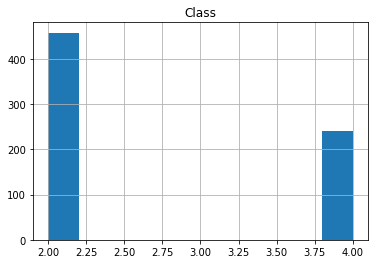

In [178]:
# Histogram plot for Target variable distribution
bc2_df.hist(column='Class')

#### Convert the datatype of Bare Nuclei to `int`

In [179]:
# Converting datatype of 'Bare Nuclei' to integer
bc2_df['Bare Nuclei'] = bc2_df['Bare Nuclei'].astype('int64')
bc2_df['Bare Nuclei'].dtypes

dtype('int64')

## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

In [ ]:
# Plotting scatter matrix to understande distribution of variables & Collinearity check
import seaborn as sns
bc2_df.corr()

In [98]:
# Dropping a column after correlation
bc2_df.drop('Cell Size', axis = 1)

,ID,ClumpThickness,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,2,object,3,1,1,2
1,1002945,5,4,5,7,object,3,2,1,2
2,1015425,3,1,1,2,object,3,1,1,2
3,1016277,6,8,1,3,object,3,7,1,2
4,1017023,4,1,3,2,object,3,1,1,2
5,1017122,8,10,8,7,object,9,7,1,4
6,1018099,1,1,1,2,object,3,1,1,2
7,1018561,2,2,1,2,object,3,1,1,2
8,1033078,2,1,1,2,object,1,1,5,2
9,1033078,4,1,1,2,object,2,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [176]:
# Dividing dataset into Feature set
x_feature =bc2_df.drop('Class', axis =1)
y_target  =bc2_df['Class']
x_feature.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [167]:
# Dataset bifircation into target set
y_target.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

#### Divide the Training and Test sets in 70:30 

In [168]:
# Dividing Training & Test sets in 70:30 ratio
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=0.30,random_state=1)

## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [174]:
# Data Standardization
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [170]:
# Building the model and test performed on training & test sets
# Also calculating and printing Accuracy with given values of k
from matplotlib import pyplot as plt
import numpy as np
neighbors = np.array([3,5,9])
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=0.30,random_state=1)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)
    print("For K=%d, Test Accuracy=%f, & Train Accuracy=%f"%(k,test_accuracy_plot[i],train_accuracy_plot[i]))

For K=3, Test Accuracy=0.961905, & Train Accuracy=0.967280
For K=5, Test Accuracy=0.976190, & Train Accuracy=0.967280
For K=9, Test Accuracy=0.961905, & Train Accuracy=0.963190


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [171]:
# Run kNN eith given number of neighbors
neighbors = np.array([1,3,5,7,9,11,13,15,17,19])
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    X_train, X_test, y_train, y_test = train_test_split(x_feature, y_target, test_size=0.30,random_state=1)
    sc=StandardScaler()
    scaledX_train = sc.fit_transform(X_train)
    scaledX_test = sc.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scaledX_train,y_train)
    #Compute accuracy on the training set
    train_accuracy_plot[i] = knn.score(scaledX_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = knn.score(scaledX_test,y_test)
    print("For K=%d, Test Accuracy=%f, & Train Accuracy=%f"%(k,test_accuracy_plot[i],train_accuracy_plot[i]))

For K=1, Test Accuracy=0.947619, & Train Accuracy=1.000000
For K=3, Test Accuracy=0.961905, & Train Accuracy=0.967280
For K=5, Test Accuracy=0.976190, & Train Accuracy=0.967280
For K=7, Test Accuracy=0.966667, & Train Accuracy=0.965235
For K=9, Test Accuracy=0.961905, & Train Accuracy=0.963190
For K=11, Test Accuracy=0.961905, & Train Accuracy=0.967280
For K=13, Test Accuracy=0.966667, & Train Accuracy=0.963190
For K=15, Test Accuracy=0.961905, & Train Accuracy=0.963190
For K=17, Test Accuracy=0.961905, & Train Accuracy=0.965235
For K=19, Test Accuracy=0.957143, & Train Accuracy=0.965235


In [172]:
# Finding optimal number of neighbours from above list 
print("optimal number of neighbours = ", 5)

optimal number of neighbours =  5


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

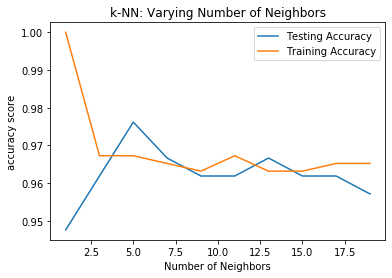

In [173]:
# Plotting Accuracy score versus k values
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('accuracy score')
plt.show()